In [ ]:
# !pip install pandas numpy matplotlib tensorflow scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

In [12]:
train_df = pd.read_csv('train_data.csv').dropna(subset=['text', 'sentiment'])
test_df = pd.read_csv('test_data.csv').dropna(subset=['text', 'sentiment'])

In [6]:
test_df.head()

,text,sentiment
0,yes black red fav colors really wanted colors ...,0
1,qu buy open house weekend ampm best value one ...,1
2,fran greet air thats okay hahahaha thanks,1
3,omg thats awesome goood luck u meet caaute cal...,1
4,hahahhaha good point,1


In [24]:
MAX_NUM_WORDS = 100000
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM = 128

In [13]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

In [14]:
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
print(np.unique(y_train))
print(np.isnan(y_train).sum())


[0. 1.]
0


In [16]:
list(tokenizer.index_word.items())[:20]

[(1, '<OOV>'),
 (2, 'im'),
 (3, 'good'),
 (4, 'day'),
 (5, 'get'),
 (6, 'like'),
 (7, 'go'),
 (8, 'dont'),
 (9, 'today'),
 (10, 'going'),
 (11, 'love'),
 (12, 'work'),
 (13, 'cant'),
 (14, 'got'),
 (15, 'time'),
 (16, 'back'),
 (17, 'lol'),
 (18, 'u'),
 (19, 'one'),
 (20, 'know')]

In [17]:
word_index = tokenizer.word_index
print(f'{len(word_index)} unikatowych słów.')

339365 unikatowych słów.


In [33]:
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)),
    GRU(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 128)       │    12,800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,839,361 (48.98 MB)

 Trainable params: 12,839,361 (48.98 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(X_val, y_val)
)

Epoch 1/5
4145/4145 ━━━━━━━━━━━━━━━━━━━━ 827s 199ms/step - accuracy: 0.7607 - loss: 0.4877 - val_accuracy: 0.7925 - val_loss: 0.4414
Epoch 2/5
4145/4145 ━━━━━━━━━━━━━━━━━━━━ 858s 198ms/step - accuracy: 0.8019 - loss: 0.4269 - val_accuracy: 0.7962 - val_loss: 0.4349
Epoch 3/5
4145/4145 ━━━━━━━━━━━━━━━━━━━━ 766s 175ms/step - accuracy: 0.8138 - loss: 0.4058 - val_accuracy: 0.7960 - val_loss: 0.4380
Epoch 4/5
4145/4145 ━━━━━━━━━━━━━━━━━━━━ 802s 193ms/step - accuracy: 0.8253 - loss: 0.3844 - val_accuracy: 0.7946 - val_loss: 0.4427
Epoch 5/5
4145/4145 ━━━━━━━━━━━━━━━━━━━━ 786s 190ms/step - accuracy: 0.8356 - loss: 0.3640 - val_accuracy: 0.7919 - val_loss: 0.4574


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nDokładność na danych testowych: {test_acc:.4f}')f\

9953/9953 ━━━━━━━━━━━━━━━━━━━━ 67s 7ms/step - accuracy: 0.7922 - loss: 0.4559

Dokładność na danych testowych: 0.7929


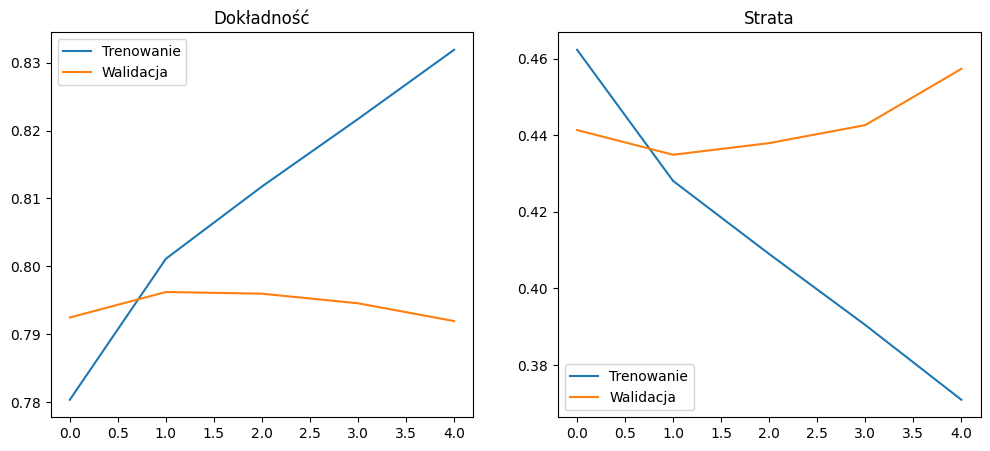

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trenowanie')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.title('Strata')
plt.legend()

plt.show()